In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') #Gives us whitegrid background
#for all our visualizations
%matplotlib inline

In [3]:
from pandas.io.data import DataReader #lets us read
#stock info from google or yahoo finance

C:\Users\Sidna\Anaconda2\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [4]:
from datetime import datetime #using datetime to set
#start and end time of our datagrab

In [5]:
from __future__ import division #now we don't have to worry
#about float numbers. In python 3 you don't need to do this

In [6]:
tech_list = ['AAPL', 'GOOG','MSFT','AMZN'] #tech stock
#ticker list 

In [7]:
end = datetime.now()#today

start = datetime(end.year-1,end.month,end.day)
#start time is now 1 year ago from todays date

In [8]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)
#for every stock in the list, Datareader takes the ticker
#and specified website, start and end dates andthen returns
#the stock information. 
#Globals takes that stock tickers and makes it into a 
#global variable so if you call the ticker it displays
#a dataframe anywhere now

In [9]:
AAPL.describe() #describes the data. We'll be using
#the adj close price history since it is the one that
#is usually used for stock analysis

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,105.138810,106.176151,104.086865,105.153651,4.466077e+07,103.755682
std,8.357141,8.386036,8.266967,8.320655,1.996278e+07,7.810483
min,90.000000,91.669998,89.470001,90.339996,1.304640e+07,89.853242
25%,97.215000,98.205000,96.427500,97.137499,3.167515e+07,96.300820
50%,105.550000,106.475002,104.849998,105.775002,3.996875e+07,104.469563
75%,111.782500,112.697500,110.327499,112.055000,5.231265e+07,109.879084
max,123.129997,123.820000,121.620003,122.570000,1.622063e+08,120.004194


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-08-17 to 2016-08-15
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


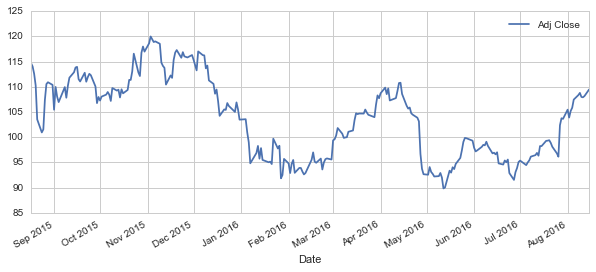

In [11]:
AAPL['Adj Close'].plot(legend = True, figsize=(10,4))
#closing price over past year

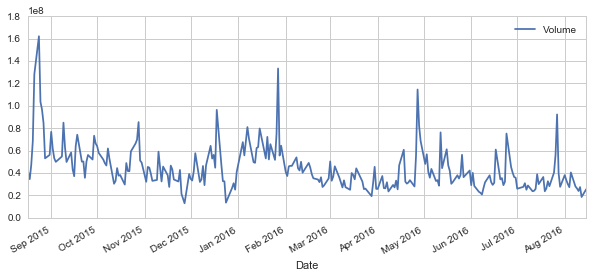

In [12]:
AAPL['Volume'].plot(legend=True, figsize = (10,4))
#volume of stock traded over past year

In [13]:
#creating a 10, 20 and 50 day moving 
#average graph
ma_day = [20,50,100,5]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()
#so we're creating 3 new columns. a moving average
#for 10, 20 and 30 days. pd.rolling_mean makes this from the adj close
#column and the taken interval is fromt he list
#in lecture he used pd.rolling_mean(AAPL['Adj Close'], ma), but that
#is a deprecated method. use the method i used above to achieve the 
#same thing

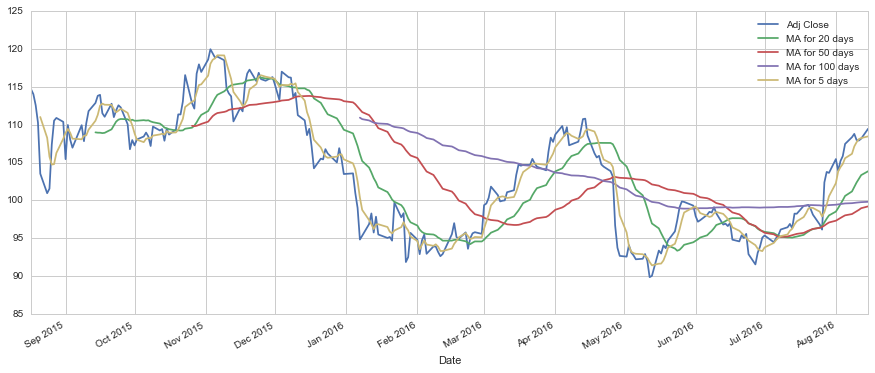

In [14]:
AAPL[['Adj Close', 'MA for 20 days','MA for 50 days','MA for 100 days', 'MA for 5 days']].plot(subplots=False, figsize = (15,6))

In [15]:
#check moving averages out on wiki 

In [16]:
#Daily returns and risk of the stock:

In [17]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
#created new column which is the percent change per
#day for the adjusted close price

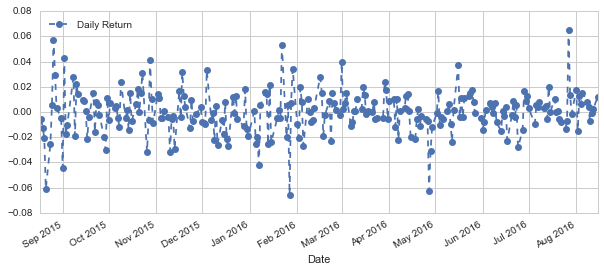

In [18]:
AAPL['Daily Return'].plot(figsize= (10,4),
                          legend = True, linestyle = '--', marker = 'o')

In [19]:
#Based on the daily return we can figure out things like risk

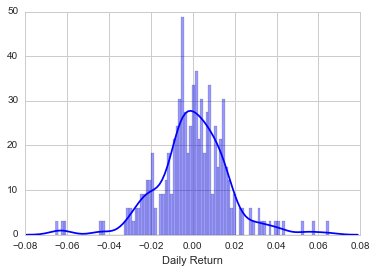

In [20]:
#average daily return for past year:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100,
            color = 'blue')
#gives us historgram of daily returns for past year.
#looks like it's skewed a bit positive!

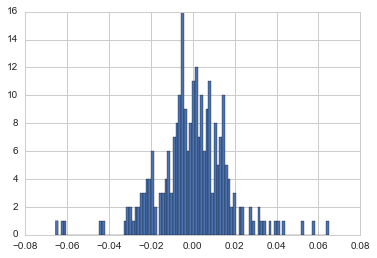

In [21]:
AAPL['Daily Return'].hist(bins=100) 
#a way to use pandas built in histogram method.
#Isn't as good as seaborn's since there's no KDE
#plot on there

In [22]:
#If we wanted to analyze the return of all the stocks
#in our list how would we do that?
#Create dataframe using DataReader to read stocks from the web
#used start and end dates. Also specified we only want 
#adj close columns
closing_df = DataReader(tech_list, 'yahoo', start,end)['Adj Close']

In [23]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-08-17,114.707448,535.219971,660.869995,46.040360
2015-08-18,114.061260,535.020020,656.130005,46.294998
2015-08-19,112.602453,532.919983,660.900024,45.648611
2015-08-20,110.291855,515.780029,646.830017,44.718205
2015-08-21,103.546087,494.470001,612.479980,42.181627


In [24]:
tech_rets=closing_df.pct_change()

In [25]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-08-17,NaN,NaN,NaN,NaN
2015-08-18,-0.005633,-0.000374,-0.007172,0.005531
2015-08-19,-0.012790,-0.003925,0.007270,-0.013962
2015-08-20,-0.020520,-0.032162,-0.021289,-0.020382
2015-08-21,-0.061163,-0.041316,-0.053105,-0.056724


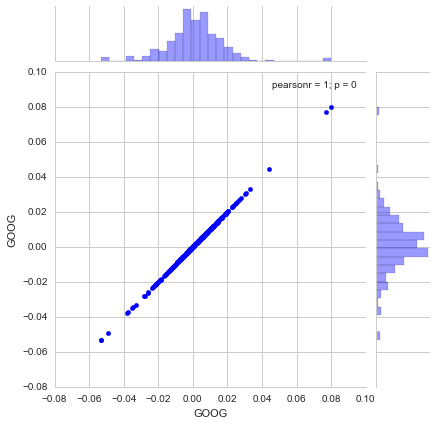

In [26]:
#comparing two stocks' daily return:
sns.jointplot('GOOG','GOOG',data=tech_rets, color = 'blue')
#here we have a perfectly linear relationship since we're
#looking at a comparison of the same stock

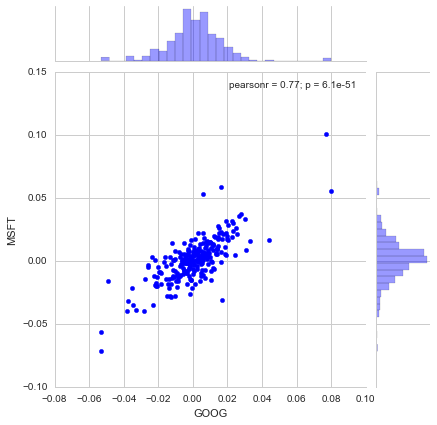

In [27]:
sns.jointplot('GOOG','MSFT',data=tech_rets, color = 'blue')

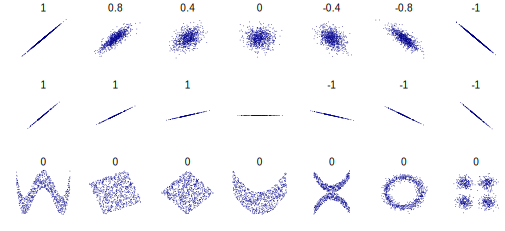

In [28]:
from IPython.display import SVG
SVG(url = 'http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

In [29]:
#Seaborn and pandas make it very easy to repeat this comparison 
#analysis for every possible combination of stocks in our 
#technology stock ticker list. We can use sns.pairplot() to
#automatically create this  plot


In [30]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-08-17,NaN,NaN,NaN,NaN
2015-08-18,-0.005633,-0.000374,-0.007172,0.005531
2015-08-19,-0.012790,-0.003925,0.007270,-0.013962
2015-08-20,-0.020520,-0.032162,-0.021289,-0.020382
2015-08-21,-0.061163,-0.041316,-0.053105,-0.056724


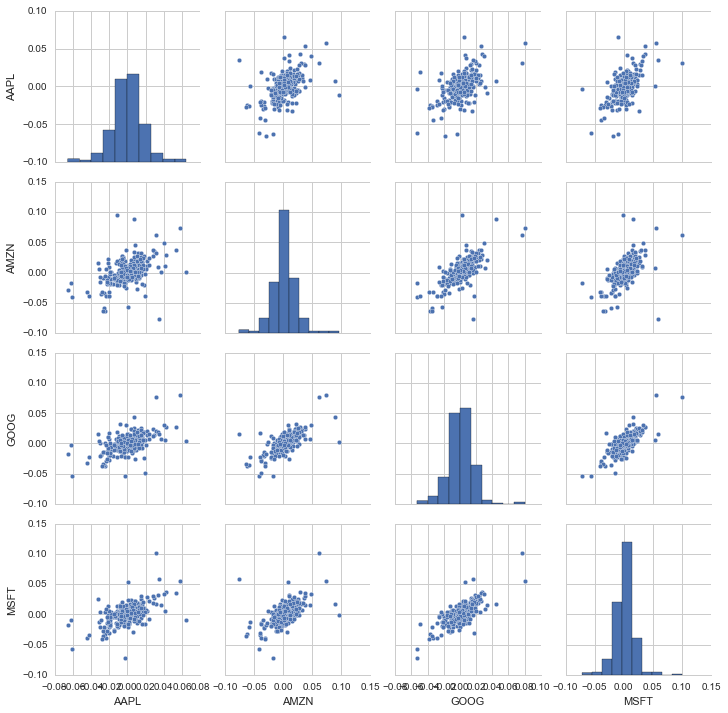

In [31]:
sns.pairplot(data=tech_rets.dropna())
#Gives you all the histograms on the diagonal. 
#upper and lower triangular graphs are correlation graphs.
#This is a much faster way of comparing all the stocks quickly

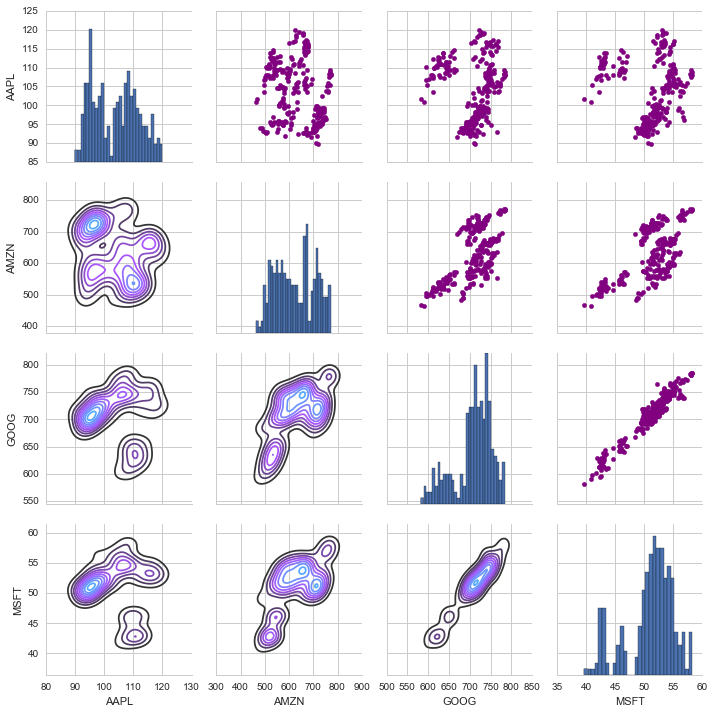

In [32]:
#comparing closing prices
returns_fig = sns.PairGrid(data = closing_df)

#decide to make upper triangular graphs be scatter plots
returns_fig.map_upper(plt.scatter,color='purple')

#KDE plot for lower triangulars
returns_fig.map_lower(sns.kdeplot,cmap = 'cool_d')

#diagonal as histograms
returns_fig.map_diag(plt.hist,bins=30)

In [33]:
corr_tech = tech_rets.corr()

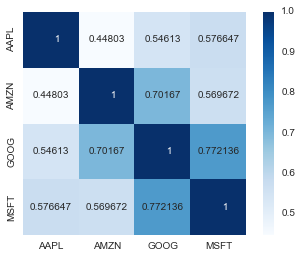

In [34]:
sns.heatmap(data = corr_tech,
           fmt = '6g', square = True, 
            cmap = 'Blues', annot = True)
#figure out what is a good "correlation" threshold

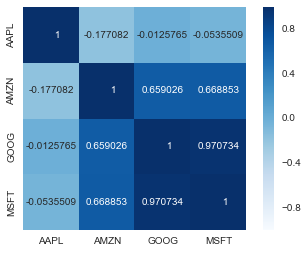

In [35]:
sns.heatmap(data = closing_df.corr(),
           fmt = '6g', square = True, 
            cmap = 'Blues', annot = True)

In [36]:
#Now we will dive into risk analysis

In [37]:
rets = tech_rets.dropna()

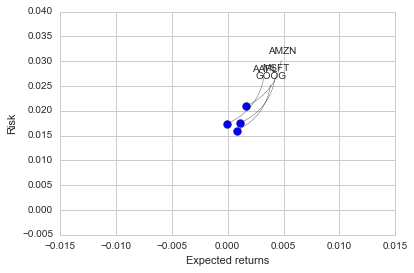

In [38]:
area = np.pi*20 #the area is used to define the area for the circles
#in the plot

plt.scatter(x=rets.mean(), y=rets.std(), s = area)

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy= (x, y), xytext = (50,50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad = -0.3'))

#rets.mean is expected returns and standard deviation is known as risk
#annotations guide: 
#http://matplotlib.org/users/annotations_guide.html

In [39]:
#Value at risk
#pretty much the amount of money we'd expect to lose for a given 
#confidence interval.
#Method 1 Bootstrap method:
#calculate the empirical quantities from a histogram of daily returns


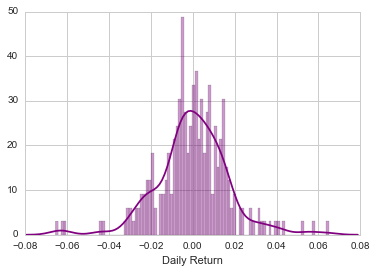

In [40]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, 
             color = 'purple')

In [41]:
rets.head() #returns dataframe we made

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-08-18,-0.005633,-0.000374,-0.007172,0.005531
2015-08-19,-0.012790,-0.003925,0.007270,-0.013962
2015-08-20,-0.020520,-0.032162,-0.021289,-0.020382
2015-08-21,-0.061163,-0.041316,-0.053105,-0.056724
2015-08-24,-0.024962,-0.062896,-0.037340,-0.032273


In [42]:
rets['MSFT'].quantile(0.05) 
#the 0.05 empirical qunatile of daily returns is -0.026 for MSFT. That
#means that with 95% confidene, our worst daily loss will not exceed
# 1.9%. So if we have 50,000 dollar investment, our one day 5% VaR
# is $1300 for the past year.SO 95% of the time, the worst you can lose
#per day is 2.6% of your investment for the past year

-0.026974898735256825

In [43]:
rets['MSFT'].quantile(0.95)

0.026067116684194591

In [44]:
#Value at risk using the Monte Carlo Method:
#use Monte Carlo method to run many trials w/ random market conditions,
#then we'll calculate portfolio losses for each trial. After that,
# we use the aggregation of all these simulations to establish how 
#risky the stock is

In [46]:
#We'll use the geometric bronian motion(GBM) which is technically known 
#as a Markov process. Stock price will follow a random walk
#and is consistent with the weak form of the efficient market hypothesis
#(EMH). Look all this up when you're done with the class, the 
#investopedia monte carlo method page is good stuff

In [48]:
#setup time horizon: (Doing this just for google right now)
days = 365

dt = 1/days

mu = rets.mean()['GOOG'] #mu is your average, associated with the 'drift'

sigma = rets.std()['GOOG'] #volatility of stock. 

#This is all in terms of the monte carlo method outlined on 
#investopedia

In [52]:
#make a function that takes in starting price,days, mu and sigma to
#
def stock_monte_carlo(start_price, days, mu, sigma):
    
    price = np.zeros(days) #array of the days in the year
    price[0] = start_price #price for the indexed day, setting initial price
    
    shock = np.zeros(days)
    drift = np.zeros(days) #shock and drift arrays
    
    for x in xrange(1, days): #from 1 to days in that range
        shock[x] = np.random.normal(loc=mu*dt, scale = sigma*np.sqrt(dt))
        
        drift[x] = mu*dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price #should return price a price array

In [53]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-08-17,656.799988,661.380005,651.239990,660.869995,1051700,660.869995
2015-08-18,661.900024,664.000000,653.460022,656.130005,1456100,656.130005
2015-08-19,656.599976,667.000000,654.190002,660.900024,2131600,660.900024
2015-08-20,655.460022,662.989990,642.900024,646.830017,2855300,646.830017
2015-08-21,639.780029,640.049988,612.330017,612.479980,4265200,612.479980


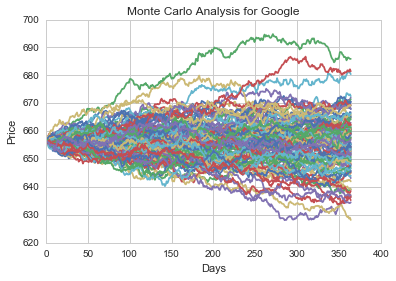

In [54]:
start_price = 656.80 #set google's start price by looking at the stock data

#plot the price array you return from using the function we defined above:
for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')


In [55]:
#clearly there's a bit of variability in prediction. So we can make
#sense of this with a histogram.
#first lets make a larger simulation than just 100:

runs = 10000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

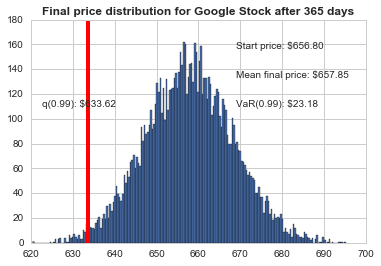

In [57]:
#we can use quantile to define our risk for this stock. 
q = np.percentile(simulations, 1) #when doing our analysis, 99% of our 
#values should fit within our output
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
#the Value at Risk for each google stick is 23.18. This means the amount
#of money you'd lose at MOST 99% of the time is 23.18.
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');